# Librairy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data

In [ ]:
data = pd.read_csv('train.csv')
labels = data['label'].values
pixels = data.drop('label', axis=1).values

In [ ]:
pixels = pixels / 255.0
pixels = pixels.reshape(-1, 28, 28, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

In [15]:
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# Model

In [16]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Epoch 1/50


2024-07-22 15:44:46.055915: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94832640 exceeds 10% of free system memory.


945/945 [==============================] - 11s 11ms/step - loss: 0.1825 - accuracy: 0.9452 - val_loss: 0.0556 - val_accuracy: 0.9857
Epoch 2/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0560 - accuracy: 0.9820 - val_loss: 0.0528 - val_accuracy: 0.9848
Epoch 3/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0371 - accuracy: 0.9874 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 4/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0384 - val_accuracy: 0.9896
Epoch 5/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0487 - val_accuracy: 0.9851
Epoch 6/50
945/945 [==============================] - 10s 11ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0443 - val_accuracy: 0.9884
Epoch 7/50
263/263 [==============================] - 1s 5ms/step - loss: 0.0388 - accuracy: 0.9886
Test accuracy: 0.9885714054107666
Model: "seque

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

In [ ]:
model.summary()

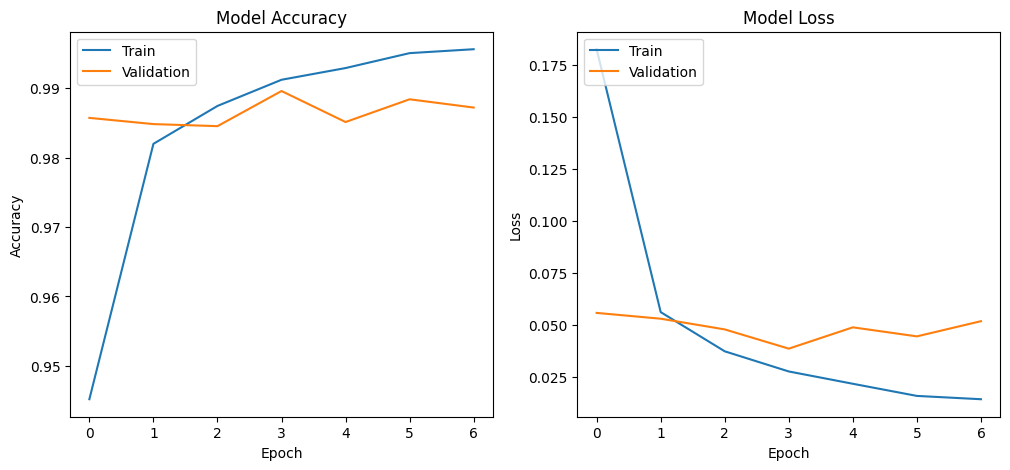

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# save H5

In [ ]:
model.save('model.h5')